# Importing our modules

In [1]:
import numpy as np
from datascience import *
import math as m

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
spreads = Table.read_table("spreads.csv")
iris =  Table.read_table("IRIS.csv")

# Demo Request: Homework 10, Question 3.7

**Question 3.7.** Define a function called `fit_line`.  It should take a table like `spreads` (with the same column names and meanings) as its argument.  It should return an array containing the slope (as the first element) and intercept (as the second element) of the least-squares regression line predicting outcome from spread for that table. **(3 points)**

*Hint*: Define a function `rmse` within `fit_line` that takes a slope and intercept as its arguments. `rmse` will use the table passed into `fit_line` to compute predicted outcomes and then return the root mean squared error between the predicted and actual outcomes. Within `fit_line`, you can call `rmse` the way you would any other function.

If you haven't tried to use the `minimize` [function](http://data8.org/sp22/python-reference.html) yet, now is a great time to practice. Here's an [example from the textbook](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization).

<!--
BEGIN QUESTION
name: q3_7
manual: false
points:
 - 0
 - 0
 - 3
-->

In [ ]:

def fit_line(tbl):
    # Your code may need more than 1 line below here.
    def rmse(..., ...):
        return ... 
    return ... 

    
# Here is an example call to your function.  To test your function,
# figure out the right slope and intercept by hand.
example_table = Table().with_columns(
    "Spread", make_array(0, 1),
    "Outcome", make_array(1, 3))
fit_line(example_table)

### To help us answer this question, we will rely upon the results of Question 3.5 

**Question 3.5.** Define a function called `errors`.  It should take three arguments:
1. a table `tbl` like `spreads` (with the same column names and meanings, but not necessarily the same data)
2. the `slope` of a line (a number)
3. the `intercept` of a line (a number).

It should **return an array of the errors** made when a line with that slope and intercept is used to predict outcome from spread for each game in the given table. **(3 points)**

*Note*: Make sure you are returning an array of the errors, and not the RMSE. 

In [ ]:
def errors(tbl, slope, intercept):
    predictions = slope * tbl.column("Spread") + intercept 
    return tbl.column("Outcome") - predictions 

Note that the question above helps us calculate an array of **residuals** where we find the difference between the our estimate of *y* versus the observed value of *y*. <br>  

In the prompt for question 3.7, within the `fit_line` function, we see the start of creating the `rmse` function. Therefore, we want to use the `errors` function to help calculate the **Root Mean Square Error**. 

In [ ]:
# This is from: Lecture (5_04) Demo Hub - After
def rmse_from_05_04(slope,intercept):
    x_array = birds.column('Egg Weight')
    y_array = birds.column('Bird Weight')
    
    prediction = slope * x_array + intercept
    errors = y_array - prediction #here is the output of the errors function defined above. 
    
    return (np.mean(errors**2))**(1/2)

Once we define the function (`rmse`) we can take advantage of the `minimize` function to help identify the slope and intercept that yields the minimum error, the line of best fit as desired. 

In [ ]:

def fit_line(tbl):
    # Your code may need more than 1 line below here.
    def rmse(..., ...):
        return ...
    return ...

    
# Here is an example call to your function.  To test your function,
# figure out the right slope and intercept by hand.
example_table = Table().with_columns(
    "Spread", make_array(0, 1),
    "Outcome", make_array(1, 3))

#Testing the output:
print('Output:\t',fit_line(example_table))
print('Expected: [2., 1.]')

# Classification - Examination through ScatterPlots

In [3]:
iris

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


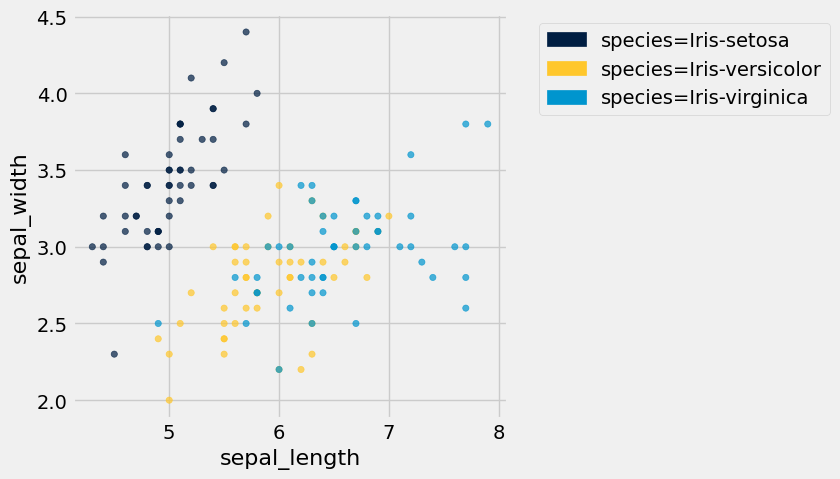

In [4]:
#let's pick two of the column labels above and observe the scatter plot. 
# Note that each of the three species will be a different color on the plot to help us differentiate 
# the iris flower species

iris.scatter('sepal_length' , 'sepal_width' , group = 'species')

# Identifying key variables for classification

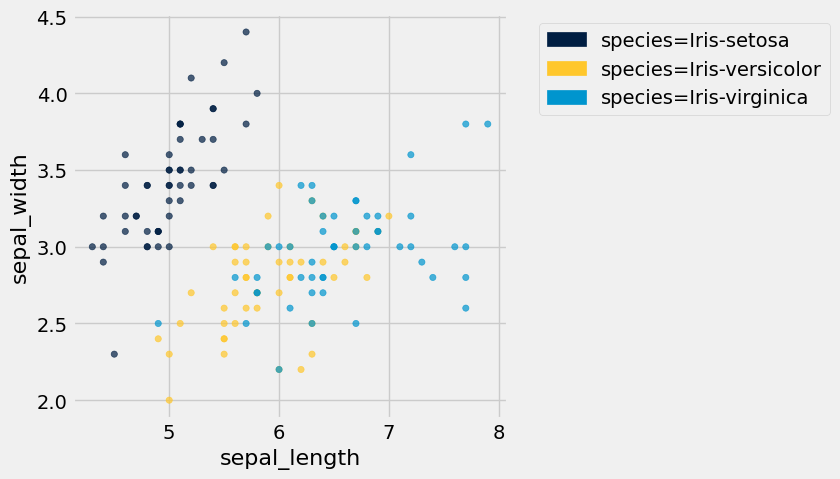

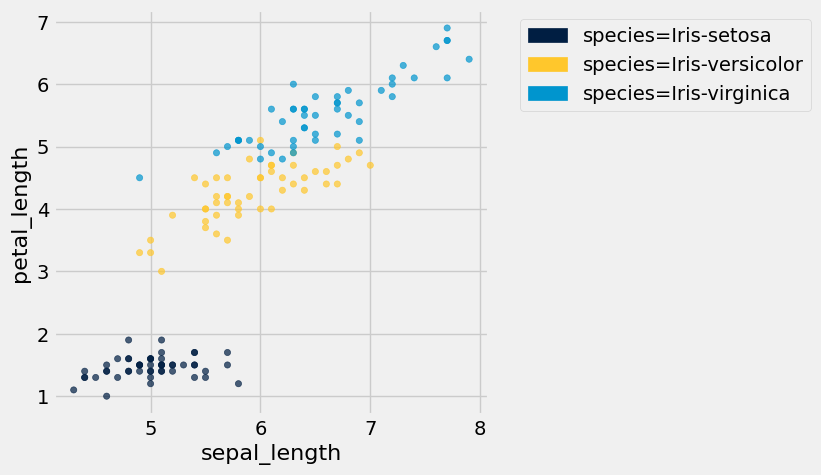

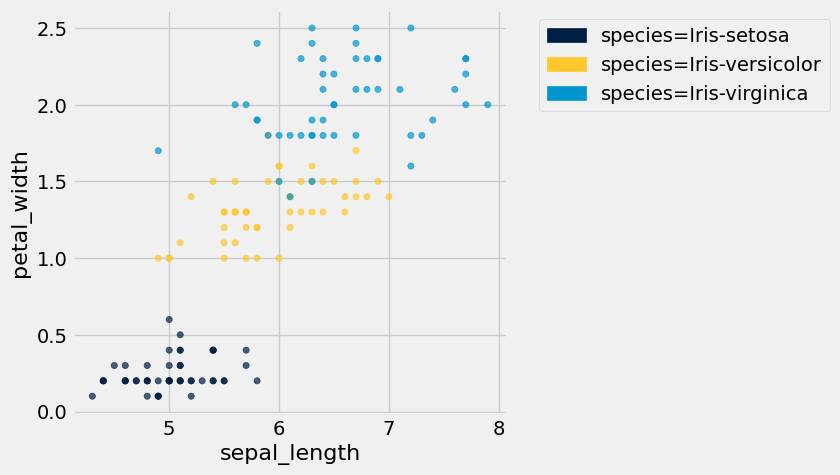

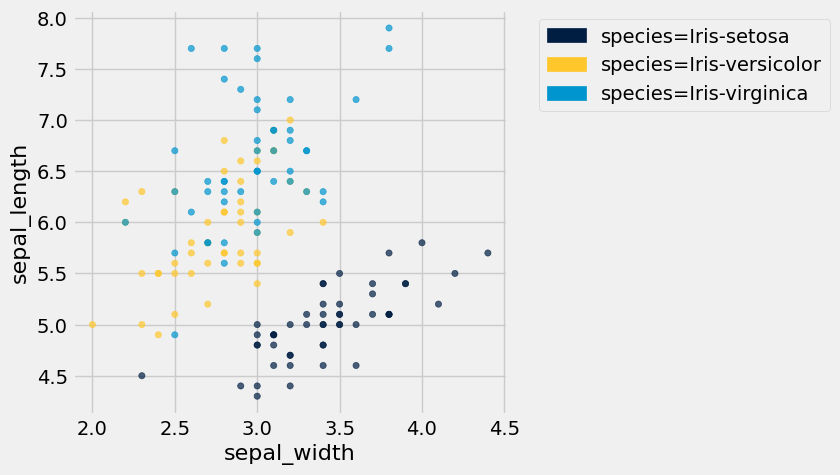

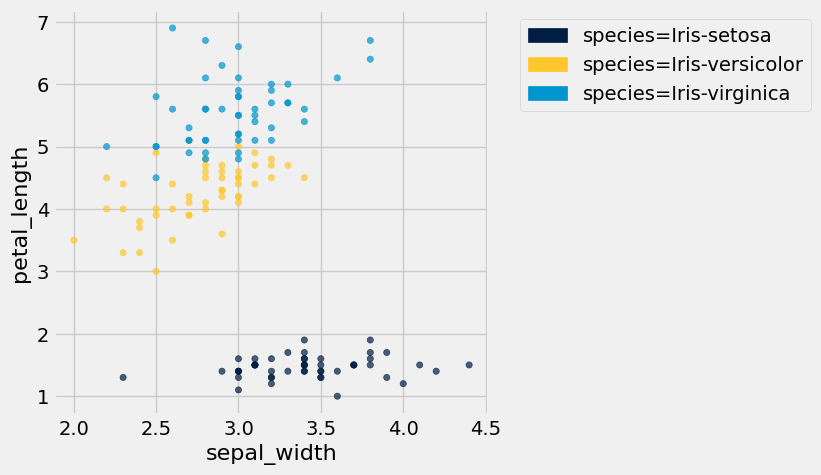

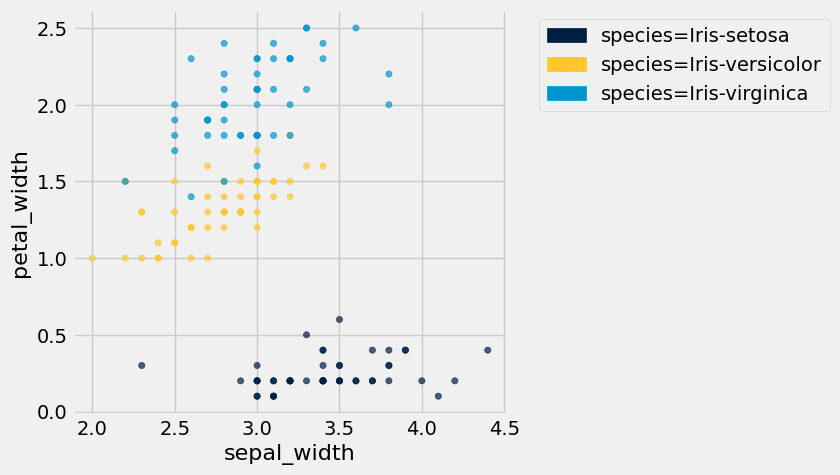

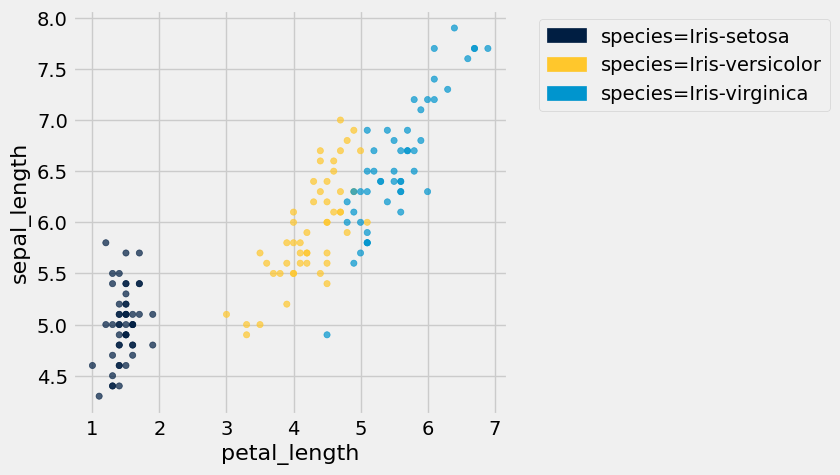

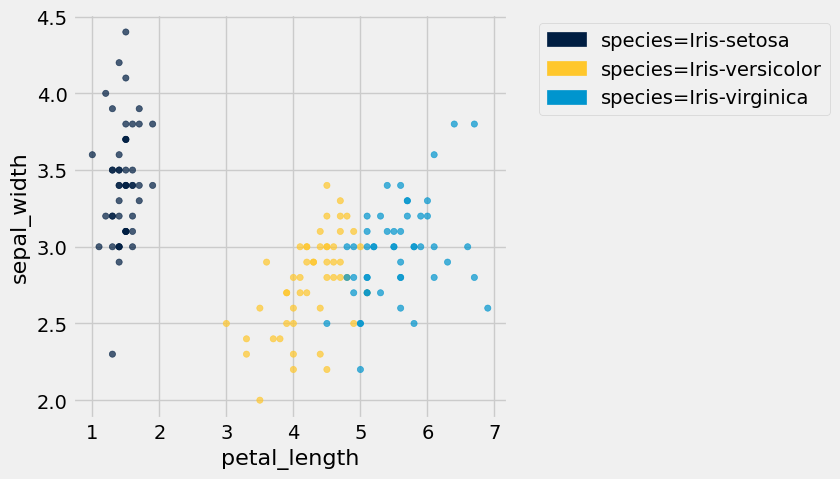

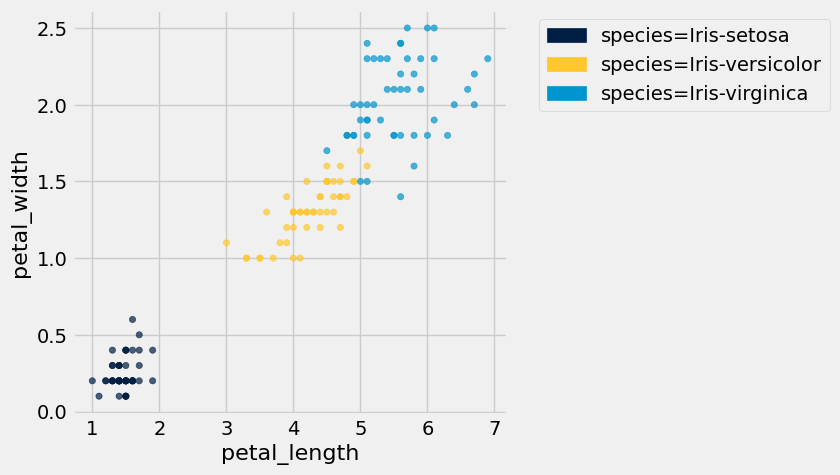

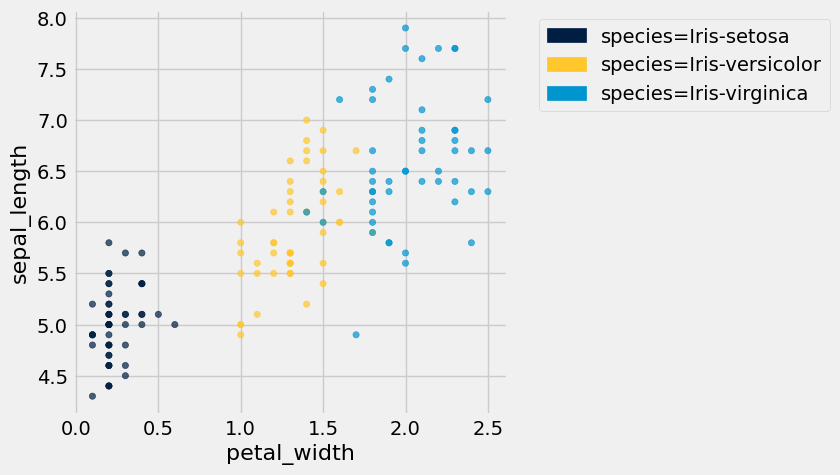

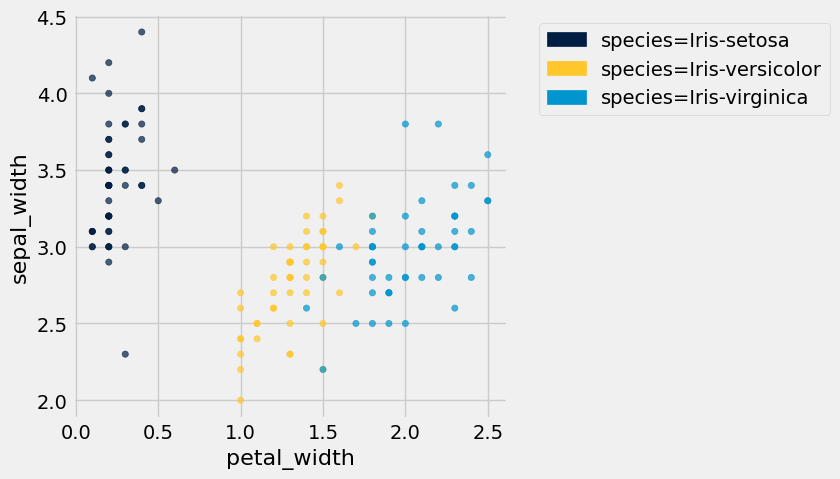

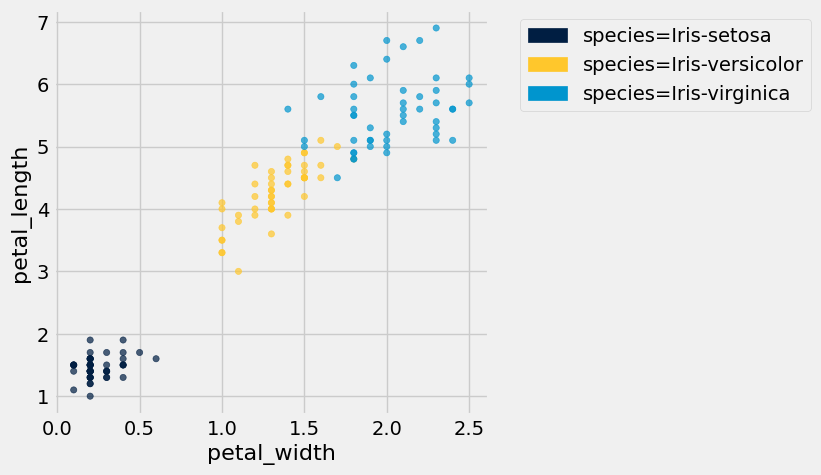

In [5]:
#Now let's look at comparing ALL of the labels to each other in pairwise comparisons
#run the code below 

labels_without_species = list(iris.labels)[:-1]

for x in labels_without_species:
    for y in labels_without_species:
        if x != y:
            iris.scatter(x,y,group='species')

# Creating Training and Testing Data Sets

In [6]:
print('The iris data set has',iris.num_rows,'flowers represented in the sameple')

The iris data set has 150 flowers represented in the sameple


In [7]:
iris.show()

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


Let's separate 100 rows of data and use it for the training set, and then use the remaining 50 rows of data for the test set. Since the table is organized nicely by species (which is what we are classifying) we want to mix these rows up. We can do this using the `sample` method to shuffle, and then `take` the first 100 rows for training, and the last 50 rows for testing

In [8]:
iris.sample(with_replacement = False)

sepal_length,sepal_width,petal_length,petal_width,species
5.5,2.4,3.8,1.1,Iris-versicolor
5.4,3.4,1.7,0.2,Iris-setosa
4.3,3,1.1,0.1,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
6.4,2.9,4.3,1.3,Iris-versicolor
5,3.5,1.3,0.3,Iris-setosa
5.7,2.5,5,2,Iris-virginica
5.4,3.4,1.5,0.4,Iris-setosa
5.6,2.5,3.9,1.1,Iris-versicolor
7.4,2.8,6.1,1.9,Iris-virginica


In [9]:
shuffled_iris = iris.sample(with_replacement = False)

train_iris = shuffled_iris.take(np.arange(100))
test_iris = shuffled_iris.take(np.arange(100,150))

print("Training set:\t",   train_iris.num_rows, "examples")
print("Test set:\t",       test_iris.num_rows, "examples")
train_iris.show(5), test_iris.show(5);

Training set:	 100 examples
Test set:	 50 examples


sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.8,1.5,0.3,Iris-setosa
5.9,3.2,4.8,1.8,Iris-versicolor
4.4,3.2,1.3,0.2,Iris-setosa
4.9,2.4,3.3,1,Iris-versicolor
5,3.2,1.2,0.2,Iris-setosa


sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.8,1.6,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
7.7,3.8,6.7,2.2,Iris-virginica
5,3.3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa


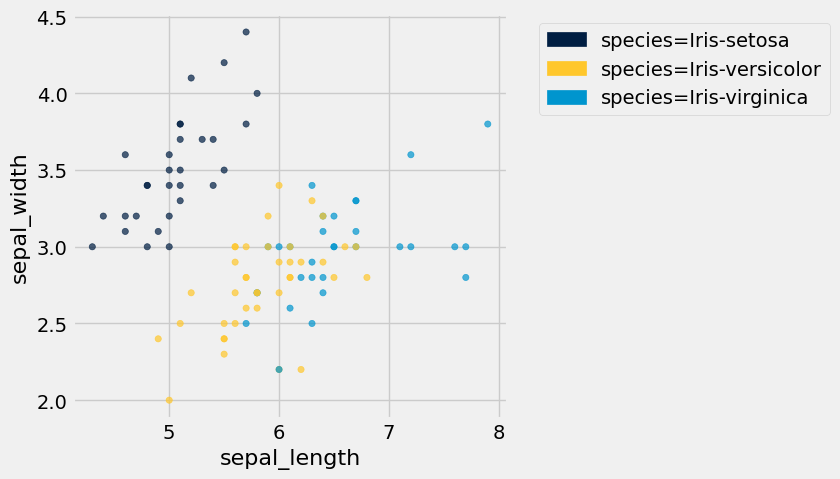

In [10]:
train_iris.scatter('sepal_length','sepal_width',group='species')

# The Distance Formula

In [11]:
((3 - 0)**2 + (4 - 0)**2)**(0.5)

5.0

In [12]:
first = make_array(0,0)
second = make_array(3,4)

(sum((first - second)**2))**(0.5)

5.0

In [13]:
first_iris = iris.column('petal_length')
second_iris = iris.column('petal_width')

(sum((first_iris - second_iris)**2))**(0.5)

33.872702874143364